coefficient difference is 0.11
coefficient difference is 0.1
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.12
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.12
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.11
coefficient difference is 0.12
coefficient difference is 0.11


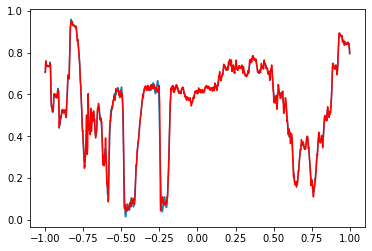

In [25]:
import pandas as pd
pups_df = pd.read_csv('../Resources/pupSlice.csv',header=None)
y = pups_df.values[:,0]

X = 2*(pups_df.index.values - 3023/2)/3023

import numpy as np

nums_degree = [int(round(x,0)) for x in np.logspace(1,2.3,30)]
nums_error = []
nums_cond = []

for num_degree in nums_degree:
    #num_degree = 100

    vander = np.polynomial.chebyshev.chebvander(X,num_degree)
    nums_cond.append(np.linalg.cond(vander))

    coef = np.polynomial.chebyshev.chebfit(X,y,num_degree)

    print(f"coefficient difference is {round(np.linalg.norm(coef[0:4]-np.polynomial.chebyshev.chebfit(X,y,3)),2)}")

    pol = np.polynomial.chebyshev.Chebyshev(coef[:])


    ys = np.apply_along_axis(pol,0,X)

    nums_error.append(np.linalg.norm(ys-y,2))

import matplotlib.pyplot as plt
plt.plot(X,ys)
plt.plot(X,y,c='r')

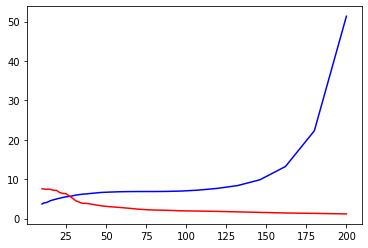

In [26]:
plt.plot(nums_degree,nums_cond,c='b')
plt.plot(nums_degree,nums_error,c='r')

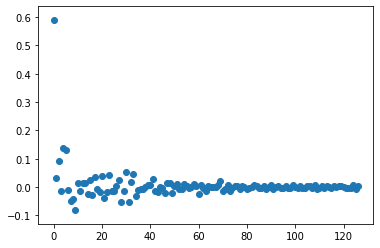

In [19]:
plt.scatter(range(0,num_degree+1),coef[:])

The condition number isn't good because chebyshev polynomials aren't orthogonal with respect to the standard inner product -- they're orthogonal with respect to a different inner product, and under that inner product, it would be well conditioned.  This is also why I couldn't approximate with a very high degree... the conditioning went bad quickly